In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df=pd.DataFrame(pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv'))
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df.dtypes

review       object
sentiment    object
dtype: object

<Axes: xlabel='sentiment', ylabel='count'>

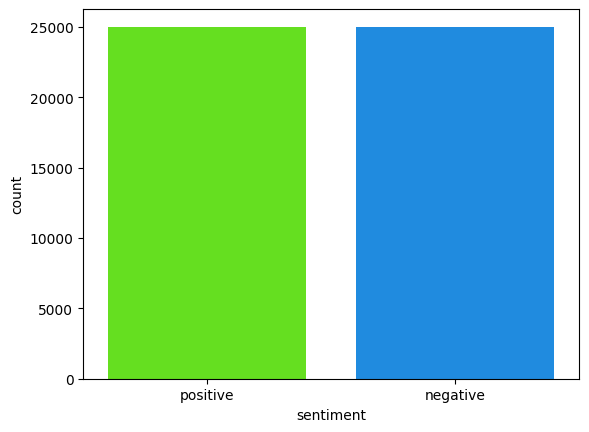

In [9]:
sns.countplot(data=df,x=df['sentiment'],palette='gist_rainbow')

In [10]:
mapping={"ain't": "is not", "aren't": "are not","can't": "cannot", 
           "'cause": "because", "could've": "could have", "couldn't": "could not", 
           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
           "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
           "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
           "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
           "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", 
           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
           "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
           "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
           "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
           "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
           "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
           "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
           "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
           "she's": "she is", "should've": "should have", "shouldn't": "should not", 
           "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
           "that'd": "that would", "that'd've": "that would have", "that's": "that is", 
           "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
           "here's": "here is","they'd": "they would", "they'd've": "they would have", 
           "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
           "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", 
           "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
           "we're": "we are", "we've": "we have", "weren't": "were not", 
           "what'll": "what will", "what'll've": "what will have","what're": "what are",  
           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
           "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
           "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", 
           "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
           "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
           "y'all're": "you all are","y'all've": "you all have","you'd": "you would", 
           "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
           "you're": "you are", "you've": "you have" }

In [11]:
import re,string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wl=WordNetLemmatizer()
stop=set(stopwords.words('english'))
punctuation=list(string.punctuation)
stop.update(punctuation)

In [12]:
print(punctuation)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [13]:
import re,string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wl=WordNetLemmatizer()
stop=set(stopwords.words('english'))
punctuation=list(string.punctuation)
stop.update(punctuation)

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    text =' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    return text

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

def lemma(text):
    text=" ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()])
    return text
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    text
    return text
#Apply function on review column
df['review']=df['review'].apply(denoise_text)

print(df.head())

/tmp/ipykernel_26/2834690060.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


                                              review sentiment
0  one reviewers mentioned watching oz episode ex...  positive
1  wonderful little filming technique fashion giv...  positive
2  thought wonderful way spend time hot summer si...  positive
3  basically family little boy thinks zombie clos...  negative
4  petter time visually stunning film mattei offe...  positive


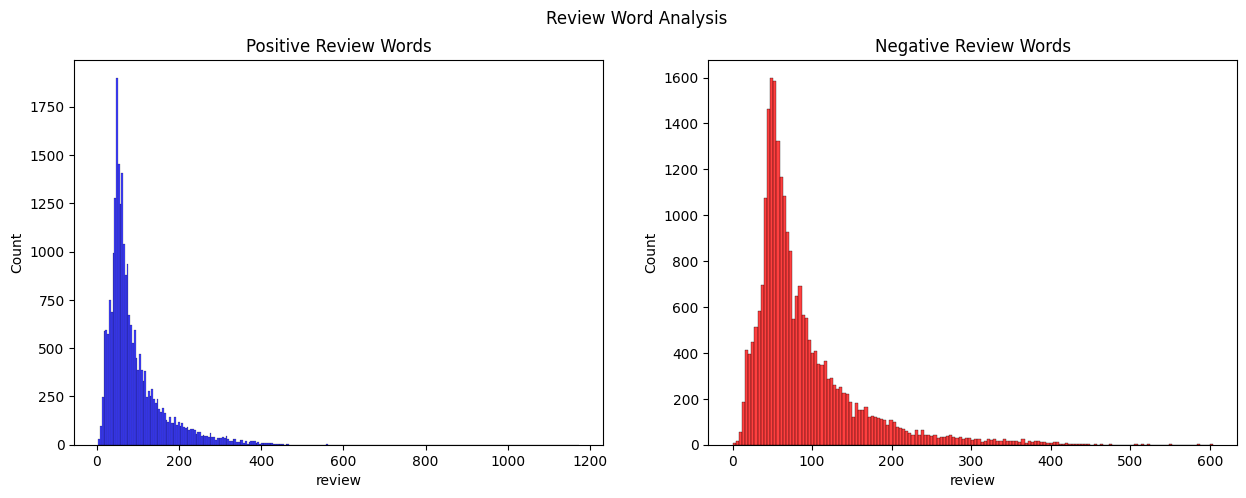

In [14]:
def get_len(data):
    return len(data)
def plot_count(count1,count2,t1,t2,subt):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.histplot(count1,ax=ax1,color='Blue')
    ax1.set_title(t1)
    sns.histplot(count2,ax=ax2,color='Red')
    ax2.set_title(t2)
    fig.suptitle(subt)
    plt.show()
    
good_rev=df[df['sentiment']=='positive']['review']
bad_rev=df[df['sentiment']=='negative']['review']
count_good=good_rev.str.split().apply(lambda z:get_len(z))
count_bad=bad_rev.str.split().apply(lambda z:get_len(z))
 
plot_count(count_good, count_bad, "Positive Review Words", "Negative Review Words", "Review Word Analysis")

In [15]:
from wordcloud import WordCloud,STOPWORDS
def disp_cloud(data):
    plt.subplots(figsize=(10,10))
    wc=WordCloud(stopwords=STOPWORDS,background_color='white',contour_width=2,max_words=2000,max_font_size=256)
    wc.generate(" ".join(data))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    plt.show()
    

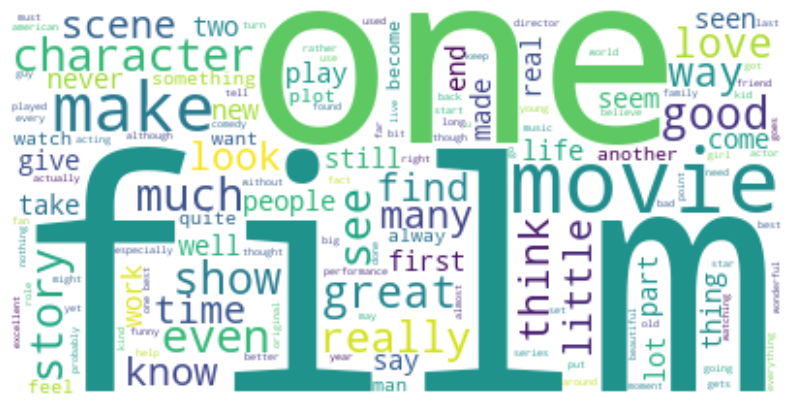

In [16]:
disp_cloud(good_rev)

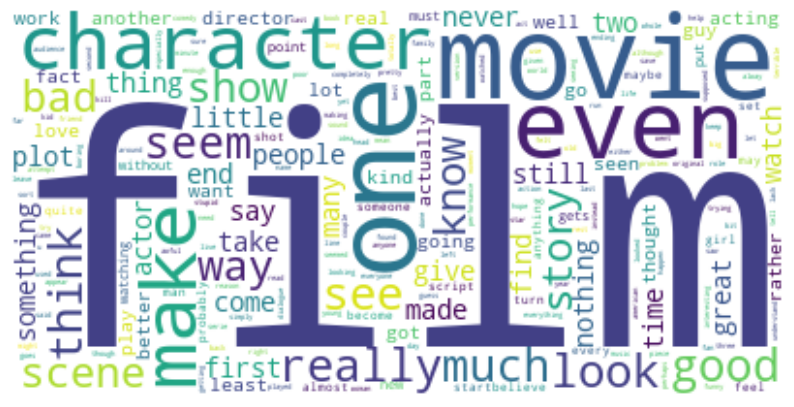

In [17]:
disp_cloud(bad_rev)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
def get_top_ngrams(corpus,n,g):
    vec=CountVectorizer(ngram_range=(g,g)).fit(corpus)
    bow=vec.transform(corpus)
    sumw=bow.sum(axis=0)
    word_freq=[(w,sumw[0,idx]) for w,idx in vec.vocabulary_.items()]
    word_freq=sorted(word_freq,key=lambda x: x[1],reverse=True)
    return word_freq[:n]

In [19]:
mcu=get_top_ngrams(df['review'], 20, 1)
mcu=dict(mcu)
temp=pd.DataFrame(columns=['Common_Words','Count'])
temp['Common_Words']=list(mcu.keys())
temp['Count']=list(mcu.values())
fig=px.bar(temp,x='Count',y='Common_Words',title="Most Common Words in the Text",orientation='h',width=700,height=700,color='Common_Words')
fig.show()

In [20]:
mcb=get_top_ngrams(df['review'], 20, 2)
mcb=dict(mcb)
temp=pd.DataFrame(columns=['Common_Words','Count'])
temp['Common_Words']=list(mcb.keys())
temp['Count']=list(mcb.values())
fig=px.bar(temp,x='Count',y='Common_Words',title="Most Common Words in the Text",orientation='h',width=700,height=700,color='Common_Words')
fig.show()

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
df['sentiment'].loc[df['sentiment']=='positive']=0.0
df['sentiment'].loc[df['sentiment']=='negative']=1.0
X=df['review']
y=df['sentiment'].values
y = np.asarray(y).astype("float64")
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_vocab_size=10000
tokenizer=Tokenizer(num_words=max_vocab_size,oov_token='<oov>')
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index
V=len(word_index)
print("Vocabulary of the Dataset is: ",V)

Vocabulary of the Dataset is:  76486


In [23]:
seq_train=tokenizer.texts_to_sequences(X_train)
seq_test=tokenizer.texts_to_sequences(X_test)
seq_len_list=[len(i) for i in seq_train+seq_test]
max_len=max(seq_len_list)
max_seq_len=int(np.mean(seq_len_list)+2*np.std(seq_len_list))
print("Maximum Length: ",max_len," Maximum Sequence Length: ",max_seq_len)

Maximum Length:  1173  Maximum Sequence Length:  226


In [24]:


#%%Padding the Sequences
pad_train=pad_sequences(seq_train,truncating='post',padding='pre',maxlen=max_seq_len)
pad_test=pad_sequences(seq_test,truncating='post',padding='pre',maxlen=max_seq_len)
#%%Spilitting the dataset for the Validation?
X_train,X_val,y_train,y_val=train_test_split(pad_train,y_train,test_size=0.2,random_state=42)



In [25]:
from tensorflow.keras.layers import Dense,Input,Embedding,LSTM,Dropout,Bidirectional,BatchNormalization, Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
def LSTM_model(X_train,X_val,y_train,y_val,V,D,maxlen,epochs):
    print("---Building the model---")
    print("----Building the model----")
    i = Input(shape=(maxlen,))
    x = Embedding(V + 1, D,input_length = maxlen)(i)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Conv1D(32,5,activation = 'relu')(x)
    x = Dropout(0.3)(x)
    x = MaxPooling1D(2)(x)
    x = Bidirectional(LSTM(128,return_sequences=True))(x)
    x = LSTM(64)(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation='sigmoid')(x)
    model= Model(i,x)
    model.summary()

    print('---Training the network---')
    model.compile(optimizer=Adam(0.0005),loss='binary_crossentropy',metrics=['accuracy'])
    r=model.fit(X_train,y_train,epochs=epochs,verbose=2,batch_size=32)
    print("Train Score: ",model.evaluate(X_train,y_train))
    print("Validation Score: ",model.evaluate(X_val,y_val))
    n_epochs=len(r.history['loss'])
    return r,model,n_epochs
#%% Model Training
D=64
epochs=10
r,model,epochs=LSTM_model(X_train, X_val, y_train, y_val, V, D, max_seq_len, epochs)
#%%

---Building the model---
----Building the model----
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 226)]             0         
                                                                 
 embedding (Embedding)       (None, 226, 64)           4895168   
                                                                 
 batch_normalization (BatchN  (None, 226, 64)          256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 226, 64)           0         
                                                                 
 conv1d (Conv1D)             (None, 222, 32)           10272     
                                                                 
 dropout_1 (Dropout)         (None, 222, 32)           0         
         

In [26]:
print("Evaluating the model on the testing data: ")
res=model.evaluate(pad_test,y_test)
print(dict(zip(model.metrics_names, res)))

Evaluating the model on the testing data: 
313/313 [==============================] - 3s 7ms/step - loss: 0.6244 - accuracy: 0.8553
{'loss': 0.6243740916252136, 'accuracy': 0.8553000092506409}


313/313 [==============================] - 3s 6ms/step
[[1.]
 [0.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]]
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      5039
         1.0       0.84      0.88      0.86      4961

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



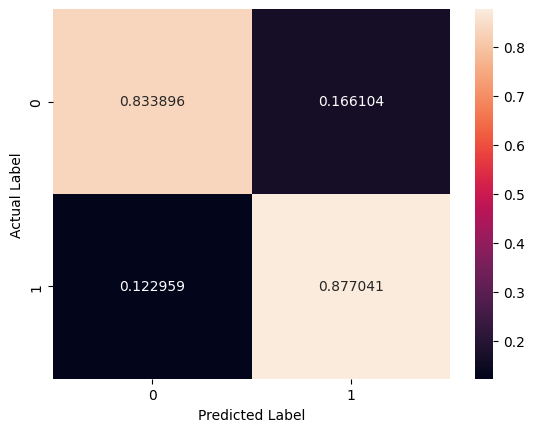

In [27]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=np.round(model.predict(pad_test))
print(y_pred)
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred,normalize='true')
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()